In [1]:
''' compare RTOFS against alongtrack SD absolute current '''
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys
from scipy import stats
# from metpy import calc
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from convert_dir import vector_dir_to_from
from values_to_colors import truncate_colormap
from convert_time import datetime_to_yearday

In [2]:
''' SD data info '''
year = '2023'
platfs_num = ['1031','1036','1040','1041','1042','1045','1057','1064','1065','1068','1069','1083']#['1036','1041','1069']
path_SD = os.path.expanduser('~/Documents/projects/sd-ni-wp/SD_currents/compare_SD_model/data_timeseries_match_SD_RTOFS/')
filenames_SD_all = np.sort( os.listdir(path_SD) )
filenames_SD = np.array([])
for file in filenames_SD_all:
    if ('.txt' in file) & (year in file) & (file[-14:-10] in platfs_num):
        filenames_SD = np.append(filenames_SD, file)
print(len(filenames_SD), filenames_SD)

12 ['timeseries_cur_match_2023-SD1031_RTOFS.txt'
 'timeseries_cur_match_2023-SD1036_RTOFS.txt'
 'timeseries_cur_match_2023-SD1040_RTOFS.txt'
 'timeseries_cur_match_2023-SD1041_RTOFS.txt'
 'timeseries_cur_match_2023-SD1042_RTOFS.txt'
 'timeseries_cur_match_2023-SD1045_RTOFS.txt'
 'timeseries_cur_match_2023-SD1057_RTOFS.txt'
 'timeseries_cur_match_2023-SD1064_RTOFS.txt'
 'timeseries_cur_match_2023-SD1065_RTOFS.txt'
 'timeseries_cur_match_2023-SD1068_RTOFS.txt'
 'timeseries_cur_match_2023-SD1069_RTOFS.txt'
 'timeseries_cur_match_2023-SD1083_RTOFS.txt']


In [3]:
''' load all SD data in filenames_SD and plot stats '''
if 'data_all' in locals():
    del data_all
for i, platf_num in enumerate( platfs_num ):
    temp = np.genfromtxt( path_SD+'timeseries_cur_match_'+year+'-SD'+platf_num+'_RTOFS.txt', dtype=float,\
                         delimiter=' ',skip_header=1)
    temp = np.column_stack( (i*np.ones( (temp.shape[0],) ), temp) )
    ''' append to data_all '''
    if 'data_all' not in locals():
        data_all = temp
    else:
        data_all = np.vstack( (data_all, temp) )
    print(platf_num, data_all.shape)

1031 (1719, 8)
1036 (3626, 8)
1040 (4509, 8)
1041 (5953, 8)
1042 (6625, 8)
1045 (8914, 8)
1057 (10171, 8)
1064 (10605, 8)
1065 (11522, 8)
1068 (12998, 8)
1069 (15061, 8)
1083 (17199, 8)


Shape of 1031 U : (1719, 8)
Shape of 1036 U : (1907, 8)
Shape of 1040 U : (883, 8)
Shape of 1041 U : (1444, 8)
Shape of 1042 U : (672, 8)
Shape of 1045 U : (2289, 8)
Shape of 1057 U : (1257, 8)
Shape of 1064 U : (434, 8)
Shape of 1065 U : (917, 8)
Shape of 1068 U : (1476, 8)
Shape of 1069 U : (2063, 8)
Shape of 1083 U : (2138, 8)
Shape of 1031 V : (1719, 8)
Shape of 1036 V : (1907, 8)
Shape of 1040 V : (883, 8)
Shape of 1041 V : (1444, 8)
Shape of 1042 V : (672, 8)
Shape of 1045 V : (2289, 8)
Shape of 1057 V : (1257, 8)
Shape of 1064 V : (434, 8)
Shape of 1065 V : (917, 8)
Shape of 1068 V : (1476, 8)
Shape of 1069 V : (2063, 8)
Shape of 1083 V : (2138, 8)


<Figure size 432x288 with 0 Axes>

<Figure size 1440x1044 with 0 Axes>

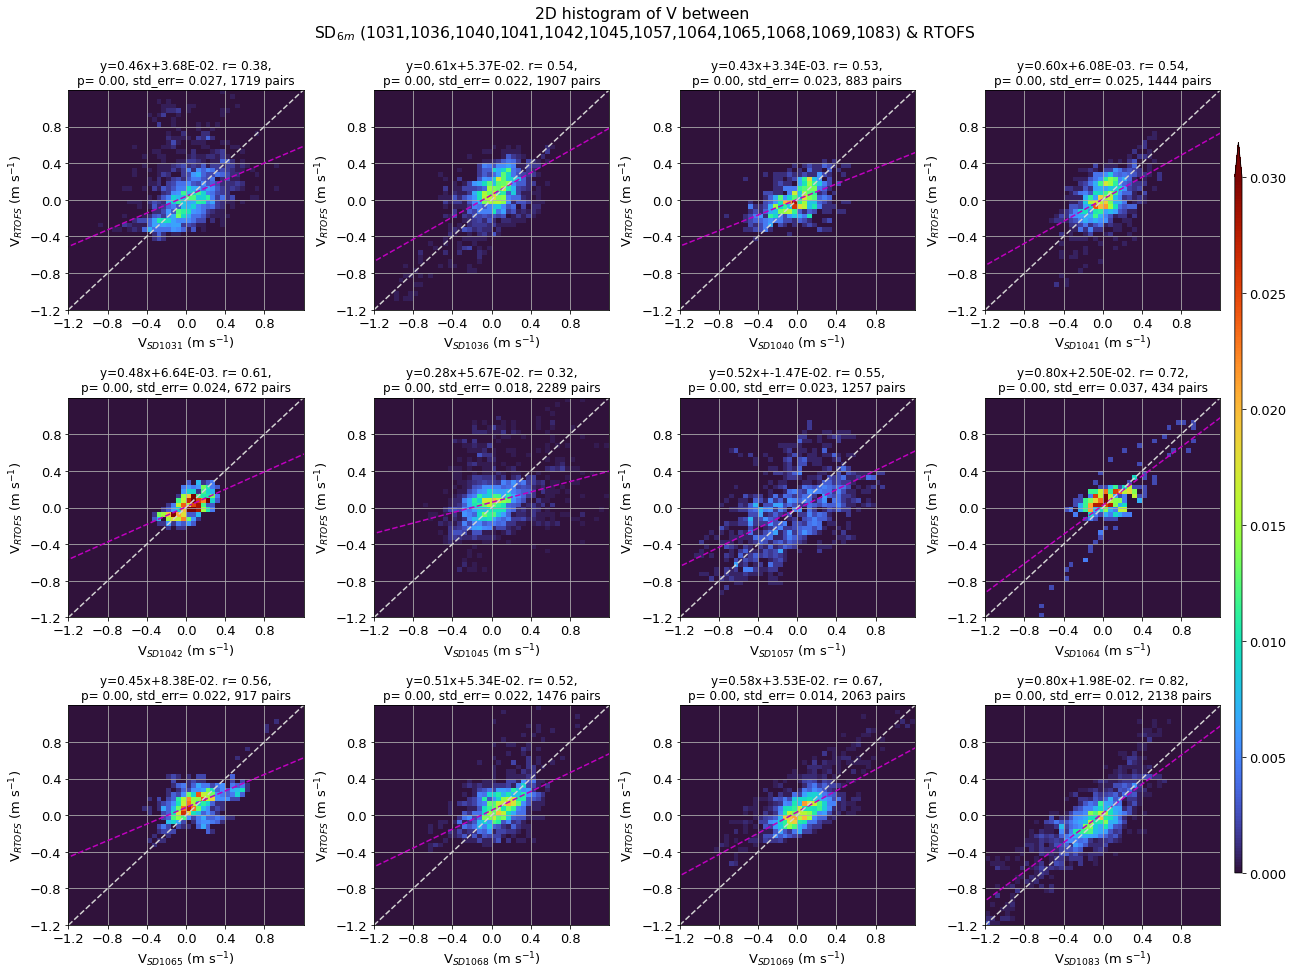

In [4]:
''' plot 2D-histogram of u & v - individual SD '''
nrow = 3; ncol = 4
bins = np.arange(-1.25,1.25,0.05)
xlim = [-1.2,1.2]
x0 = np.arange(bins[0],bins[-1]+0.1,0.1)
histlim = [0,0.03]
vars_to_plot = ['U','V']
''' plot '''
for v, var_to_plot in enumerate( vars_to_plot ):
    plt.clf()
    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol)
    fig.set_size_inches(20, 14.5)
    for i, platf_num in enumerate(platfs_num):
        irows = np.where( data_all[:,0] == i )[0]
        print('Shape of',platf_num,var_to_plot,':',data_all[irows,:].shape)
        ''' plot '''
        plt.subplot(nrow,ncol,i+1)
        x = data_all[irows,4+v*2]
        y = data_all[irows,5+v*2]
        slope, intercept, r, p, std_err = stats.linregress(x,y)
        h, xedges,yedges = np.histogram2d(x, y, bins=bins,density=True)
        cs = plt.pcolormesh(xedges, yedges, h.transpose()/h.sum(), cmap='turbo',vmin=histlim[0],vmax=histlim[1])
        plt.plot( x0, x0*slope+intercept, 'm--')
        plt.xlabel(var_to_plot+'$_{SD'+platf_num+'}$ (m s$^{-1}$)')
        plt.ylabel(var_to_plot+'$_{RTOFS}$ (m s$^{-1}$)')
        plt.title('y={:.2f}x+{:.2E}. r= {:.2f},\np= {:.2f}, std_err= {:.3f}, {:.0f} pairs'\
                  .format(slope,intercept,r,p,std_err,len(irows)), fontsize=12)
        # break
    ''' add colorbar '''
    axf = fig.add_axes([0.91,0.15,0.005,0.7])
    axf = plt.colorbar(cs,orientation='vertical',cax=axf,extend='max')
    # axf.set_label('',fontsize=14)
    ''' settings '''
    for i in range(nrow*ncol):
        plt.subplot(nrow,ncol,i+1)
        # plt.axis('equal')
        plt.plot(xlim,xlim,'--',color='lightgray')
        plt.grid()
        plt.xticks(np.arange(xlim[0],xlim[1],0.4))
        plt.yticks(np.arange(xlim[0],xlim[1],0.4))
        plt.xlim(xlim)
        plt.ylim(xlim)
    plt.suptitle('2D histogram of '+var_to_plot+' between \nSD$_{6m}$ ('+','.join(platfs_num)+') & RTOFS')
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.4)
    ''' save figure '''
    plt.savefig('2Dhist_'+var_to_plot+'_SD(6m)('+year+':'+'-'.join(platfs_num)+')_RTOFS.png',dpi=400,bbox_inches='tight')

/Users/chi/opt/anaconda3/envs/pycode/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<Figure size 432x288 with 0 Axes>

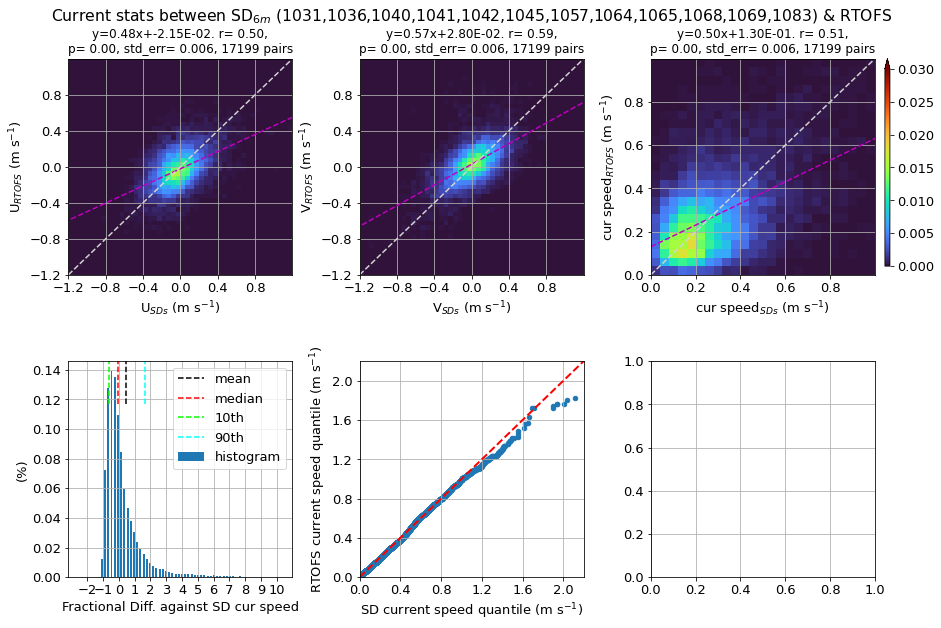

In [5]:
''' plot stats '''
nrow = 2; ncol = 3
bins = np.arange(-1.25,1.25,0.05)
bins_spd = np.arange(0,1.2,0.04)
xlim = [-1.2,1.2]
xlim_spd = [0,1]
x0 = np.arange(bins[0],bins[-1]+0.1,0.1)
x0_spd = np.arange(bins_spd[0],bins_spd[-1]+0.1,0.1)
histlim = [0,0.03]
vars_to_plot = ['U','V']
''' plot 2D-histogram of u & v - all SDs specified '''
plt.clf()
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(nrows=nrow,ncols=ncol)
fig.set_size_inches(14, 9)
for v, var_to_plot in enumerate( vars_to_plot ):
    ''' plot '''
    plt.subplot(nrow,ncol,v+1)
    x = data_all[:,4+v*2]
    y = data_all[:,5+v*2]
    slope, intercept, r, p, std_err = stats.linregress(x,y)
    h, xedges,yedges = np.histogram2d(x, y, bins=bins,density=True)
    cs = plt.pcolormesh(xedges, yedges, h.transpose()/h.sum(), cmap='turbo',vmin=histlim[0],vmax=histlim[1])
    plt.plot( x0, x0*slope+intercept, 'm--')
    plt.xlabel(var_to_plot+'$_{SDs}$ (m s$^{-1}$)')
    plt.ylabel(var_to_plot+'$_{RTOFS}$ (m s$^{-1}$)')
    plt.title('y={:.2f}x+{:.2E}. r= {:.2f},\np= {:.2f}, std_err= {:.3f}, {:.0f} pairs'\
                .format(slope,intercept,r,p,std_err,data_all.shape[0]), fontsize=12)
''' plot 2D-histogram of current speed '''
plt.subplot(nrow,ncol,3)
x = np.sqrt( np.square(data_all[:,4]) + np.square(data_all[:,6]) )
y = np.sqrt( np.square(data_all[:,5]) + np.square(data_all[:,7]) )
slope, intercept, r, p, std_err = stats.linregress(x,y)
h, xedges,yedges = np.histogram2d(x, y, bins=bins_spd,density=True)
cs = plt.pcolormesh(xedges, yedges, h.transpose()/h.sum(), cmap='turbo',vmin=histlim[0],vmax=histlim[1])
plt.plot( x0_spd, x0_spd*slope+intercept, 'm--')
plt.xlabel('cur speed$_{SDs}$ (m s$^{-1}$)')
plt.ylabel('cur speed$_{RTOFS}$ (m s$^{-1}$)')
plt.title('y={:.2f}x+{:.2E}. r= {:.2f},\np= {:.2f}, std_err= {:.3f}, {:.0f} pairs'\
            .format(slope,intercept,r,p,std_err,data_all.shape[0]), fontsize=12)
''' add colorbar '''
axf = fig.add_axes([0.91,0.58,0.005,0.32])
axf = plt.colorbar(cs,orientation='vertical',cax=axf,extend='max')
''' plot fractional differences against SD current speed and their mean '''
plt.subplot(nrow,ncol,4)
frac_diff = (y-x)/x
hist, xedges = np.histogram(frac_diff, bins=np.linspace(-2.5,10.5,65),density=True)
plt.bar(xedges[:-1], hist/hist.sum(), width=0.12, align='center',label='histogram')
ylim_gca = plt.gca().get_ylim()
ylim_marker = [ylim_gca[0]+0.8*np.diff(ylim_gca), ylim_gca[1]]
plt.plot(np.mean(frac_diff)*np.array([1,1]),ylim_marker,'k--',label='mean')
plt.plot(np.median(frac_diff)*np.array([1,1]),ylim_marker,'r--',label='median')
plt.plot(np.percentile(frac_diff,10)*np.array([1,1]),ylim_marker,'--',color='lime',label='10th')
plt.plot(np.percentile(frac_diff,90)*np.array([1,1]),ylim_marker,'--',color='cyan',label='90th')
plt.legend()
plt.ylim(ylim_gca)
plt.ylabel('(%)')
plt.xlabel('Fractional Diff. against SD cur speed')
''' plot quantile-quantile plot comparing SD and RTOFS current speed probability distribution 
by their quantiles against each other.
Follow Q-Q plot with 2 datasets 
https://www.yourdatateacher.com/2021/06/21/how-to-use-q-q-plot-for-checking-the-distribution-of-our-data/ '''
plt.subplot(nrow,ncol,5)
plt.scatter(np.sort(x), np.sort(y),s=20)
# plt.plot([min(x),max(x)],[min(y),max(y)],'r--')
plt.plot([0,2.2],[0,2.2],'r--',lw=2)
plt.xlabel('SD current speed quantile (m s$^{-1}$)')
plt.ylabel('RTOFS current speed quantile (m s$^{-1}$)')
''' settings '''
for i in range(nrow*ncol):
    plt.subplot(nrow,ncol,i+1)
    if i < 3:
        plt.plot(xlim,xlim,'--',color='lightgray')
    plt.grid()
    if i < 2:
        plt.xticks(np.arange(xlim[0],xlim[1],0.4))
        plt.yticks(np.arange(xlim[0],xlim[1],0.4))
        plt.xlim(xlim)
        plt.ylim(xlim)
    if i == 2:
        plt.xticks(np.arange(xlim_spd[0],xlim_spd[1],0.2))
        plt.yticks(np.arange(xlim_spd[0],xlim_spd[1],0.2))
        plt.xlim(xlim_spd)
        plt.ylim(xlim_spd)
    if i == 3:
        plt.xticks(np.arange(-2,11,1))
    if i == 4:
        plt.xlim([0,2.2])
        plt.ylim([0,2.2])
        plt.xticks(np.arange(0,2.2,0.4))
        plt.yticks(np.arange(0,2.2,0.4))
plt.suptitle('Current stats between SD$_{6m}$ ('+','.join(platfs_num)+') & RTOFS')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.4)
''' save figure '''
plt.savefig('2Dhist_quantile_'+''.join(vars_to_plot)+'_SD(6m)('+year+':'+'-'.join(platfs_num)+')_RTOFS.png',dpi=400,bbox_inches='tight')
        

In [9]:
''' compute other stats between RTOFS & SD current speeds '''
x = np.sqrt( np.square(data_all[:,4]) + np.square(data_all[:,6]) )
y = np.sqrt( np.square(data_all[:,5]) + np.square(data_all[:,7]) )
''' conditions applied '''
isOK = np.where( x< 0.25 )[0]
print(len(isOK)/len(x))
x = x[isOK]
y = y[isOK]
''''''
mag_vect_diff = np.sqrt( np.square(data_all[isOK,4]-data_all[isOK,5])+np.square(data_all[isOK,6]-data_all[isOK,7]) )
print('RMSD of magnitude of vector difference= {:.2f} cm/s'.format( np.sqrt( np.sum(np.square(mag_vect_diff))/len(mag_vect_diff))*100 ) )
bias = np.sum( y-x )/len(x)
print('bias (RTOFS against SD current speed)= {:.2f} cm/s'.format(bias*100))
SDE = np.sqrt( np.sum( np.square(y-x-bias) )/len(x) )
print('SDE (std of errors or residual difference) of current speed= {:.2f} cm/s'.format(SDE*100))
SP_RTOFS_MEAN = np.nanmean(y)
SDRTOFS = np.sqrt( np.sum( np.square(y-SP_RTOFS_MEAN) )/len(y) )
SNR = SDRTOFS/SDE
print('SNR (signal-to-noise ratio)= {:.2f}'.format(SNR))

0.8969707541136113
RMSD of magnitude of vector difference= 28.99 cm/s
bias (RTOFS against SD current speed)= 1.56 cm/s
SDE (std of errors or residual difference) of current speed= 16.91 cm/s
SNR (signal-to-noise ratio)= 0.93


In [223]:
''' compute vector direction from '''
cur_dir_from_SD = np.nan*np.ones( (data_all.shape[0],) )
cur_dir_from_RTOFS = cur_dir_from_SD.copy()
cur_dir_to_SD = cur_dir_from_SD.copy()
for i in range( len(cur_dir_from_SD) ):
    cur_dir_to_SD[i], cur_dir_from_SD[i] = vector_dir_to_from( data_all[i,4],data_all[i,6] )
    _, cur_dir_from_RTOFS[i] = vector_dir_to_from( data_all[i,5],data_all[i,7] )

''' compute degree from RTOFS to SD current (positive clockwise) '''
deg_R2SD_cw = cur_dir_from_SD-cur_dir_from_RTOFS
deg_R2SD_cw[deg_R2SD_cw> 180] = deg_R2SD_cw[deg_R2SD_cw> 180] -360
deg_R2SD_cw[deg_R2SD_cw< -180] = deg_R2SD_cw[deg_R2SD_cw< -180] +360

mean, median of current dir from RTOFS to SD (uSD)= 3.96, 6.95 degrees
mean, median of current dir from RTOFS to SD (uSD< 0.25)= 2.01, 4.49 degrees
mean, median of current dir from RTOFS to SD (uSD> 1)= 23.99, 12.60 degrees


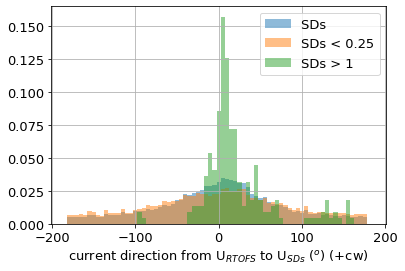

In [169]:
''' plot '''
x = np.sqrt( np.square(data_all[:,4]) + np.square(data_all[:,6]) )
conds_str = ['','< 0.25','> 1']
bins = np.arange(-180,190,5)
for i, cond_str in enumerate( conds_str ):
    if cond_str == '':
        isOK = np.arange(0,len(x))
    else:
        isOK = np.where( eval('x'+cond_str) )[0]
    hist, bin_edges = np.histogram(deg_R2SD_cw[isOK],bins=bins,density=True);
    plt.bar(bin_edges[:-1], hist/hist.sum(), width=5, label='SDs '+cond_str,alpha=0.5)
    print('mean, median of current dir from RTOFS to SD (uSD'+cond_str+')= {:.2f}, {:.2f} degrees'\
          .format(np.mean(deg_R2SD_cw[isOK]), np.median(deg_R2SD_cw[isOK])))
plt.grid()
plt.legend()
plt.xlabel('current direction from U$_{RTOFS}$ to U$_{SDs}$ ($^o$) (+cw)')
plt.savefig('hist_cur-deg-fromRTOFS-to-SDs_'+year+'.png',dpi=400,bbox_inches='tight')

In [170]:
''' load topography data '''
path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_23_Jan_2025/'
ds_topo = nc.Dataset(path_topo+'gebco_2024_n50.0_s5.0_w-98.0_e-30.0.nc')
# print(ds_topo)
lon_topo = ds_topo.variables['lon'][:]
lat_topo = ds_topo.variables['lat'][:]
elevation = ds_topo.variables['elevation'][:]
print(lon_topo.shape, lat_topo.shape, elevation.shape )

(16320,) (10800,) (10800, 16320)


<Figure size 432x288 with 0 Axes>

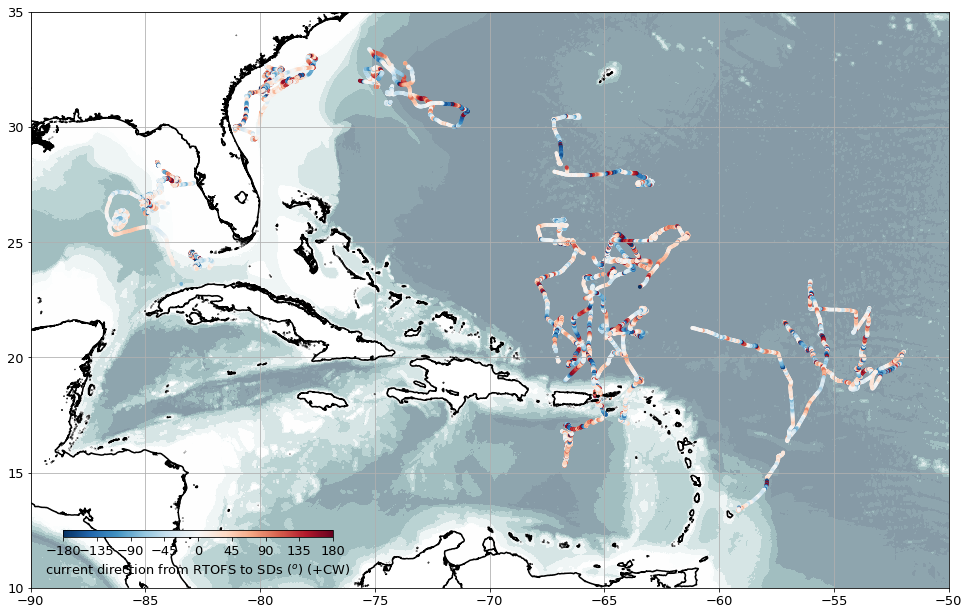

In [190]:
''' plot SD tracks colored by current stats between RTOFS & SDs '''
lonlim = [-90,-50]#[-90,-40]
latlim = [10,35]#[5,40]
ilon = np.where( (lon_topo>= lonlim[0]) & (lon_topo<= lonlim[1]) )[0]
ilat = np.where( (lat_topo>= latlim[0]) & (lat_topo<= latlim[1]) )[0]
cmap = truncate_colormap(plt.get_cmap('bone'),0.6,1)
''' plot topo basemap '''
plt.clf()
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 13})
ax2 = fig.add_axes([0.05,0,0.85,0.8])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap=cmap,levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
ax2.grid()
ax2.set_xlim(lonlim)
ax2.set_ylim(latlim)
''' color SD tracks by '''
sc = ax2.scatter( data_all[:,2], data_all[:,3], c=deg_R2SD_cw, s=8, cmap='RdBu_r',vmin=-180,vmax=180 )
axf = fig.add_axes([0.08,0.07,0.25,0.01])
axf = plt.colorbar(sc,orientation='horizontal',cax=axf,extend='neither')
axf.set_ticks(np.arange(-180,225,45))
axf.set_label('current direction from RTOFS to SDs ($^o$) (+CW)')
''' save figure '''
fig.savefig('map_SD-tracks_by_deg-RTOFS2SD_'+year+'.png', dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

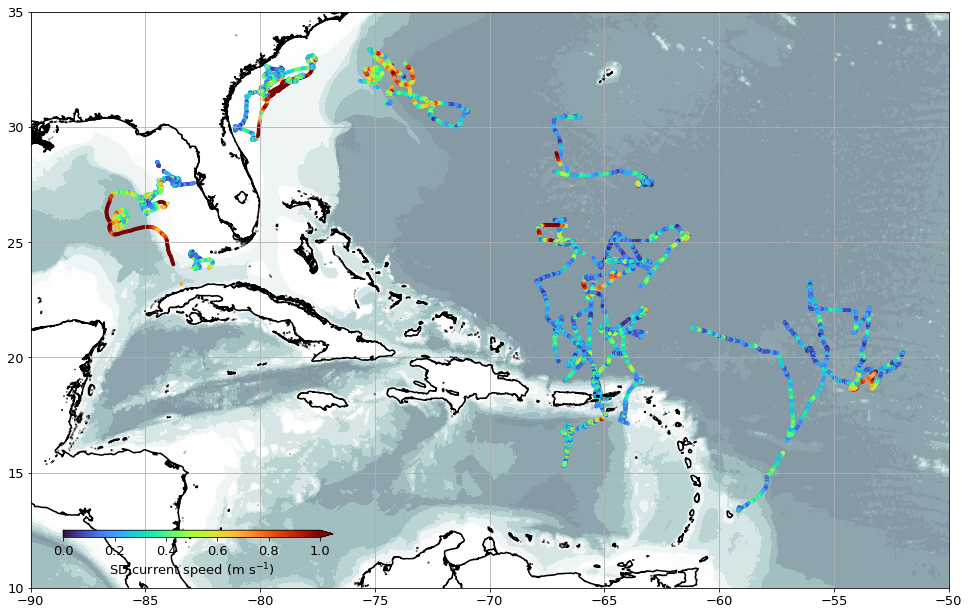

In [191]:
''' plot SD tracks colored by current stats between RTOFS & SDs '''
x = np.sqrt( np.square(data_all[:,4]) + np.square(data_all[:,6]) )
''' plot topo basemap '''
plt.clf()
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 13})
ax2 = fig.add_axes([0.05,0,0.85,0.8])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap=cmap,levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
ax2.grid()
ax2.set_xlim(lonlim)
ax2.set_ylim(latlim)
''' color SD tracks by '''
sc = ax2.scatter( data_all[:,2], data_all[:,3], c=x, s=8, cmap='turbo',vmin=0,vmax=1 )
axf = fig.add_axes([0.08,0.07,0.25,0.01])
axf = plt.colorbar(sc,orientation='horizontal',cax=axf,extend='max')
axf.set_ticks(np.arange(0,1.2,0.2))
axf.set_label('SD current speed (m s$^{-1}$)')
''' save figure '''
fig.savefig('map_SD-tracks_by_SD-cur-spd_'+year+'.png', dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

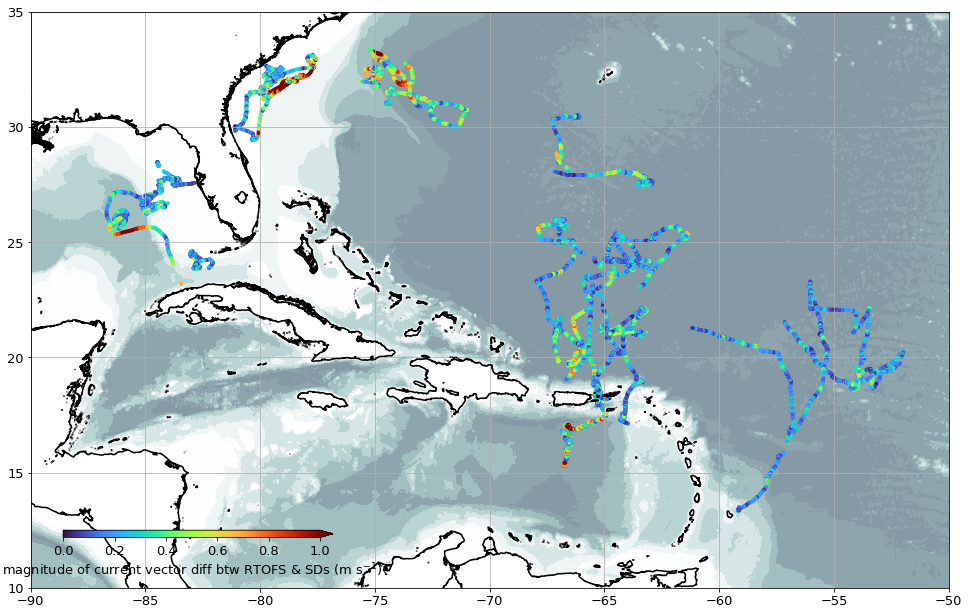

In [192]:
''' plot SD tracks colored by current stats between RTOFS & SDs '''
mag_vect_diff = np.sqrt( np.square(data_all[:,4]-data_all[:,5])+np.square(data_all[:,6]-data_all[:,7]) )
''' plot topo basemap '''
plt.clf()
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 13})
ax2 = fig.add_axes([0.05,0,0.85,0.8])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap=cmap,levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
ax2.grid()
ax2.set_xlim(lonlim)
ax2.set_ylim(latlim)
''' color SD tracks by '''
sc = ax2.scatter( data_all[:,2], data_all[:,3], c=mag_vect_diff, s=8, cmap='turbo',vmin=0,vmax=1 )
axf = fig.add_axes([0.08,0.07,0.25,0.01])
axf = plt.colorbar(sc,orientation='horizontal',cax=axf,extend='max')
axf.set_ticks(np.arange(0,1.2,0.2))
axf.set_label('magnitude of current vector diff btw RTOFS & SDs (m s$^{-1}$)')
''' save figure '''
fig.savefig('map_SD-tracks_by_mag-vec-diff(RTOFS-vs-SDs)_'+year+'.png', dpi=600,bbox_inches='tight')

2023-07-19 00:00:00 - 2023-11-15 23:00:00
[213. 228. 244. 259. 274. 289. 305.]
['08/01', '08/16', '09/01', '09/16', '10/01', '10/16', '11/01']


<Figure size 432x288 with 0 Axes>

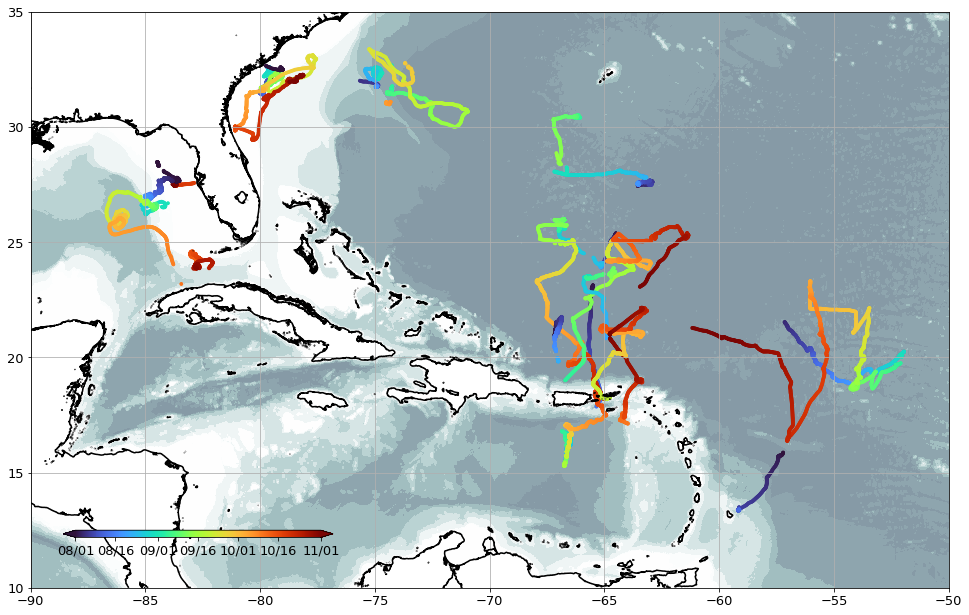

In [219]:
''' plot SD tracks colored by time '''
yday = np.nan*np.ones( (data_all.shape[0],) )
for i, timestamp in enumerate( data_all[:,1] ):
    _, yday[i] = datetime_to_yearday( datetime.datetime.fromtimestamp(timestamp) )
print(datetime.datetime.fromtimestamp(np.min(data_all[:,1])),'-',datetime.datetime.fromtimestamp(np.max(data_all[:,1])))
tticks = [datetime.datetime(int(year),8,1),datetime.datetime(int(year),8,16),\
          datetime.datetime(int(year),9,1),datetime.datetime(int(year),9,16),\
            datetime.datetime(int(year),10,1),datetime.datetime(int(year),10,16),datetime.datetime(int(year),11,1)]
tticks_label = [item.strftime('%m/%d') for item in tticks]
tticks = np.array([datetime_to_yearday(item)[1] for item in tticks])
print(tticks)
print(tticks_label)
''' plot topo basemap '''
plt.clf()
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 13})
ax2 = fig.add_axes([0.05,0,0.85,0.8])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap=cmap,levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
ax2.grid()
ax2.set_xlim(lonlim)
ax2.set_ylim(latlim)
''' color SD tracks by '''
sc = ax2.scatter( data_all[:,2], data_all[:,3], c=yday, s=8, cmap='turbo',vmin=tticks[0],vmax=tticks[-1] )
axf = fig.add_axes([0.08,0.07,0.25,0.01])
axf = plt.colorbar(sc,orientation='horizontal',cax=axf,extend='both')
axf.set_ticks(tticks)
axf.set_ticklabels(tticks_label)
''' save figure '''
fig.savefig('map_SD-tracks_by_time_'+year+'.png', dpi=600,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

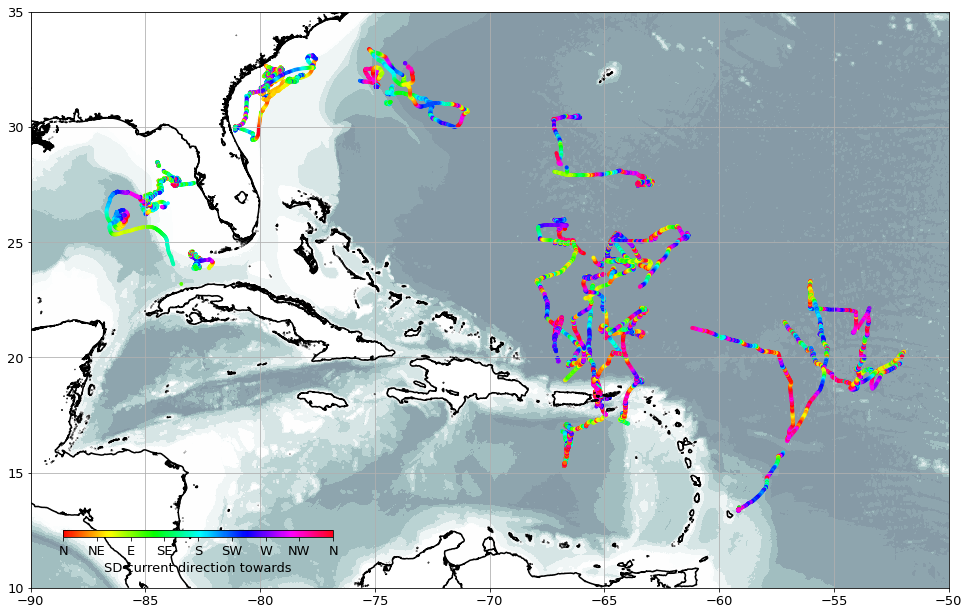

In [226]:
''' plot SD tracks colored by current direction (from) '''
lonlim = [-90,-50]#[-90,-40]
latlim = [10,35]#[5,40]
ilon = np.where( (lon_topo>= lonlim[0]) & (lon_topo<= lonlim[1]) )[0]
ilat = np.where( (lat_topo>= latlim[0]) & (lat_topo<= latlim[1]) )[0]
cmap = truncate_colormap(plt.get_cmap('bone'),0.6,1)
''' plot topo basemap '''
plt.clf()
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 13})
ax2 = fig.add_axes([0.05,0,0.85,0.8])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap=cmap,levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
ax2.grid()
ax2.set_xlim(lonlim)
ax2.set_ylim(latlim)
''' color SD tracks by '''
sc = ax2.scatter( data_all[:,2], data_all[:,3], c=cur_dir_to_SD, s=8, cmap='hsv',vmin=0,vmax=360 )
axf = fig.add_axes([0.08,0.07,0.25,0.01])
axf = plt.colorbar(sc,orientation='horizontal',cax=axf,extend='neither')
axf.set_ticks(np.arange(0,360+45,45))
axf.set_ticklabels(['N','NE','E','SE','S','SW','W','NW','N'])
axf.set_label('SD current direction towards')
''' save figure '''
fig.savefig('map_SD-tracks_by_SD-cur-dir-to_'+year+'.png', dpi=600,bbox_inches='tight')